#with real liner codes augmentation

In [1]:
import keras
print('Keras version:', keras.__version__)

import sys
import os
import tensorflow as tf
print('TensorFlow version:', tf.__version__) 
from keras import backend as K
sess = tf.Session()
K.set_session(sess)
from keras.models import model_from_json
import pandas as pd
import numpy as np
import PIL

DEVICE = "/cpu:0"  # /use cpu:0 for cpu only or /gpu:0
working_dir = os.getcwd()
print("Working directory is:",working_dir)
sys.path.append(working_dir)  # To find local version of the library
import shutil
import csv
import random
import cv2

Using TensorFlow backend.


Keras version: 2.2.4
TensorFlow version: 1.12.0
Working directory is: C:\Users\is95217\PycharmProjects\source\turkishplate\_1 Container


In [2]:
windows=True

if windows:
    ROOT_DIR = os.path.join("C:/Users/is95217/PycharmProjects/source/turkishplate/_1 Container") 
    DATA_DIR = "C:/Users/is95217/data/container/container_default/beyaz"  #win
    space = "C:/Users/is95217/data/container/container_default/spacewhite.png"
else:    
    ROOT_DIR = os.path.join("/home/user/Source/Evrim/Turkishplate")
    DATA_DIR = "/home/user/Source/data/dataEvrim/Original_15Kcrop_distributed"  #linux
sys.path.append(ROOT_DIR + "/Python")

import Augmcontainer as a

print("Data:", DATA_DIR)
print("Source code:", ROOT_DIR)

Data: C:/Users/is95217/data/container/container_default/beyaz
Source code: C:/Users/is95217/PycharmProjects/source/turkishplate/_1 Container


In [3]:
#liner gerçek bilgilere ait liste oluştur.
dir_excel = 'C:/Users/is95217/PycharmProjects/source/turkishplate/_1 Container/'
dir_container = 'D:/container data/4straightgullseye -duz/' 
ifile_name = 'liner.csv'

In [4]:
lst_real = a.create_real_list(dir_excel, dir_container,ifile_name)

55
101


# Letter& Digit List generation

In [5]:
#create letter images and name list->  ex: a.png & A

#2.nd param harf=True,digit ise false
ltr_list=[]
ltr_list= a.create_list(DATA_DIR + '/letters',True,0,0) 

#2.nd param harf=True,digit ise false
dgt_list=[]
dgt_list= a.create_list(DATA_DIR + '/digits',False,100,199) 
#C:\Users\is95217\data\container\container_default\siyah

ltr_4th=[]
ltr_4th= a.create_list(DATA_DIR + '/4th',True,0,0) 

In [6]:
len(ltr_list),len(dgt_list),len(ltr_4th)

(141, 69, 6)

In [7]:
DATA_DIR

'C:/Users/is95217/data/container/container_default/beyaz'

# %8 rotate için outb ve outb2

In [ ]:
out_dir = "D:/container data/outw2/"
try:
    shutil.rmtree(out_dir)
    print("ok1")    
except:
    print("no dir1")
os.mkdir(out_dir)

    
out_dir = "D:/container data/outw/"
try:
    shutil.rmtree(out_dir)
    print("ok1")    
except:
    print("no dir1")
os.mkdir(out_dir)


In [ ]:
out_dir = "D:/container data/outw/"
out_dir
cnt=1000

# soldan sağa normal görüntü

In [ ]:
def pic_create(dirx,cnt):
    
    lst_num = [1,2,3,4]
    #lst_num = [1]
    
    for i in range(cnt): #test
        #1 first 3 letters ***************
        #return random letters and random pictures of letters.
        #inputs: ,   
        rnd_ltr= random.choice(lst_real)    
        lst=[]
        xy=random.choice(lst_num)
        for i in range(len(rnd_ltr)):
            fname=  DATA_DIR + '/letters/' + rnd_ltr[i].lower() + str(xy) +'.PNG'
            lst.append(fname)     


        rnd_ltr4,lst4= a.rnd_list(ltr_4th, #harf_list
                            1, #howmany letters
                            DATA_DIR + '/4th',
                            0, # from 
                            len(ltr_4th))  #to
        lst4.append(space)

        #2. 6 digits
        rnd_dgt0,lstd0= a.rnd_list(dgt_list,
                                   6, #howmany
                                   DATA_DIR + '/digits',
                                   0, 
                                   len(dgt_list))      
        lstd0.append(space)

        # son rakam _rakamın çevresi kare
        result= int(rnd_dgt0)
        checkdigit= a.find_checkdigit(result)

        dgt_list2=[] 
        dgt_list2= a.create_list(DATA_DIR + '/digits_kare',
                                 False, 
                                 100+ checkdigit*10,
                                 100+checkdigit*10+9) 
        #dgt_list2= a.create_list(DATA_DIR + '/digits_kare',False) 

        #3. 1 digit (0 için 100-109, 1 için 111-119 ...)
        rnd_dgt1,lstd1= a.rnd_list(dgt_list2,
                               1, #howmany digit to be random generated
                               DATA_DIR + '/digits_kare', #sadece son hane
                               0, 
                               len(dgt_list2))         

        lst_merged = a.concat_list(DATA_DIR, lst + lst4 + lstd0 + lstd1 )
        #print(lst_merged)
        print("1:", rnd_ltr + rnd_ltr4 +rnd_dgt0 + rnd_dgt1 )    


        #concatenate pic
        a.img_concat( lst_merged,
                      dirx  ,  #directory
                      rnd_ltr + rnd_ltr4 + rnd_dgt0 + rnd_dgt1  + '.jpg')


In [ ]:
out_dir

In [ ]:
pic_create(out_dir,cnt)

# 128x64 resize 

In [ ]:
#%80 zoom out
import matplotlib.pyplot as plt
datad = 'D:/container data/outw/'
outd = 'D:/container data/outw/'

for fname in os.listdir(datad):
    img = cv2.imread(datad + fname)
    zm1 = a.clipped_zoom(img, 0.9)       
     
    img = cv2.resize(zm1, (128, 64))
    cv2.imwrite(outd + fname,img)  

# augmenting the picture by rotating

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [9]:
#rotate %8
datagen = ImageDataGenerator(
              rotation_range=8,
              width_shift_range=0.01, #optimum = 0.01
              height_shift_range=0,  #optimum = 0
              shear_range=0, #makaslama
              zoom_range=0,
              #zoom_range=-0.2,              
              rescale=None,
              #cval=0,              
              horizontal_flip=False,  
              #preprocessing_function=AHE,
              fill_mode='nearest') #constant, nearest

D:/container data/outw/ADMU1096029.jpg
D:/container data/outw/ADMU1479742.jpg
D:/container data/outw/ADMU3900556.jpg
D:/container data/outw/ADMU4441998.jpg
D:/container data/outw/ADMU5493290.jpg
D:/container data/outw/ADMU9636726.jpg
D:/container data/outw/AKLU0713779.jpg
D:/container data/outw/AKLU1123738.jpg
D:/container data/outw/AKLU5839262.jpg
D:/container data/outw/AKLU6691290.jpg
D:/container data/outw/AKLU8125348.jpg
D:/container data/outw/AKLU8412481.jpg
D:/container data/outw/AKLU9102710.jpg
D:/container data/outw/AKNU2896322.jpg
D:/container data/outw/AKNU3545091.jpg
D:/container data/outw/AKNU4412166.jpg
D:/container data/outw/AKNU6129915.jpg
D:/container data/outw/ALTU1394602.jpg
D:/container data/outw/ALTU4331789.jpg
D:/container data/outw/ALTU6452963.jpg
D:/container data/outw/ALTU7479747.jpg
D:/container data/outw/ALTU9162549.jpg
D:/container data/outw/ALTU9178433.jpg
D:/container data/outw/ALTU9941492.jpg
D:/container data/outw/AMFU1140425.jpg
D:/container data/outw/AM

D:/container data/outw/CPSU4575978.jpg
D:/container data/outw/CRLU0114961.jpg
D:/container data/outw/CRLU1395141.jpg
D:/container data/outw/CRLU3283885.jpg
D:/container data/outw/CRLU4375900.jpg
D:/container data/outw/CRLU5868995.jpg
D:/container data/outw/CRLU6126780.jpg
D:/container data/outw/CRLU7998166.jpg
D:/container data/outw/CRSU0887557.jpg
D:/container data/outw/CRSU1811414.jpg
D:/container data/outw/CRSU2101341.jpg
D:/container data/outw/CRSU2959429.jpg
D:/container data/outw/CRSU3439392.jpg
D:/container data/outw/CRSU3628196.jpg
D:/container data/outw/CRSU4159420.jpg
D:/container data/outw/CRSU4569323.jpg
D:/container data/outw/CRSU5174400.jpg
D:/container data/outw/CRSU8958917.jpg
D:/container data/outw/CRSU9479679.jpg
D:/container data/outw/CRTU0993960.jpg
D:/container data/outw/CRTU1443816.jpg
D:/container data/outw/CRTU1725340.jpg
D:/container data/outw/CRTU1821479.jpg
D:/container data/outw/CRTU3123901.jpg
D:/container data/outw/CRTU4340391.jpg
D:/container data/outw/CR

D:/container data/outw/FSAU4646950.jpg
D:/container data/outw/FSAU5824456.jpg
D:/container data/outw/FSAU7111016.jpg
D:/container data/outw/FSAU9647660.jpg
D:/container data/outw/FSAU9771146.jpg
D:/container data/outw/FSCU2123990.jpg
D:/container data/outw/FSCU3248069.jpg
D:/container data/outw/FSCU3274799.jpg
D:/container data/outw/FSCU4358420.jpg
D:/container data/outw/FSCU5144865.jpg
D:/container data/outw/FSCU5193320.jpg
D:/container data/outw/FSCU5845466.jpg
D:/container data/outw/FSCU5901863.jpg
D:/container data/outw/FSCU6045061.jpg
D:/container data/outw/FSCU6149935.jpg
D:/container data/outw/FSCU7313340.jpg
D:/container data/outw/GATU3046439.jpg
D:/container data/outw/GATU3911468.jpg
D:/container data/outw/GATU4271410.jpg
D:/container data/outw/GATU4333483.jpg
D:/container data/outw/GATU4491212.jpg
D:/container data/outw/GATU6962131.jpg
D:/container data/outw/GATU7012445.jpg
D:/container data/outw/GATU7069546.jpg
D:/container data/outw/GATU9051779.jpg
D:/container data/outw/GA

D:/container data/outw/MGLU1456895.jpg
D:/container data/outw/MGLU2534389.jpg
D:/container data/outw/MGLU2640418.jpg
D:/container data/outw/MGLU3474229.jpg
D:/container data/outw/MGLU3552110.jpg
D:/container data/outw/MGLU3904582.jpg
D:/container data/outw/MGLU4814579.jpg
D:/container data/outw/MGLU4819507.jpg
D:/container data/outw/MGLU9364278.jpg
D:/container data/outw/MIEU0353188.jpg
D:/container data/outw/MIEU5962880.jpg
D:/container data/outw/MIEU6545759.jpg
D:/container data/outw/MIEU8591616.jpg
D:/container data/outw/MIEU9977210.jpg
D:/container data/outw/MOAU1251338.jpg
D:/container data/outw/MOAU2414984.jpg
D:/container data/outw/MOAU3194741.jpg
D:/container data/outw/MOAU4289527.jpg
D:/container data/outw/MOAU4351886.jpg
D:/container data/outw/MOAU4827141.jpg
D:/container data/outw/MOAU7921672.jpg
D:/container data/outw/MOAU8163936.jpg
D:/container data/outw/MOAU9047522.jpg
D:/container data/outw/MOFU1133430.jpg
D:/container data/outw/MOFU2585540.jpg
D:/container data/outw/MO

D:/container data/outw/SJLU3911193.jpg
D:/container data/outw/SJLU4504247.jpg
D:/container data/outw/SJLU8158623.jpg
D:/container data/outw/SJLU9650432.jpg
D:/container data/outw/SKIU0752829.jpg
D:/container data/outw/SKIU1410541.jpg
D:/container data/outw/SKIU1474418.jpg
D:/container data/outw/SKIU3324442.jpg
D:/container data/outw/SKIU3735072.jpg
D:/container data/outw/SKIU3823457.jpg
D:/container data/outw/SKIU7049515.jpg
D:/container data/outw/SKIU7820593.jpg
D:/container data/outw/SKIU9865174.jpg
D:/container data/outw/SLSU4207423.jpg
D:/container data/outw/SLSU5974243.jpg
D:/container data/outw/SLSU8734308.jpg
D:/container data/outw/SLSU8992665.jpg
D:/container data/outw/SMLU1252900.jpg
D:/container data/outw/SMLU3209910.jpg
D:/container data/outw/SMLU7217815.jpg
D:/container data/outw/SMLU9143552.jpg
D:/container data/outw/SOCU1261612.jpg
D:/container data/outw/SOCU1647349.jpg
D:/container data/outw/SOCU1819796.jpg
D:/container data/outw/SOCU3859944.jpg
D:/container data/outw/SO

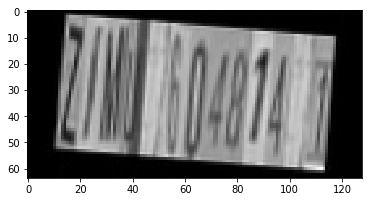

In [10]:
datad = 'D:/container data/outw/'
outd = 'D:/container data/outw2/'

for fname in os.listdir(datad):
    print(datad + fname)

    img = cv2.imread(datad + fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.resize(img, (self.img_w, self.img_h))
    #img = cv2.resize(img, (128, 64))  
    cv2.imwrite(outd + fname,img)  
    a.rotate_img(img,outd,fname,datagen,64,128)

# %20 rotate için

In [ ]:
out_dir = "D:/container data/outw3/"
try:
    shutil.rmtree(out_dir)
    print("ok1")    
except:
    print("no dir1")
os.mkdir(out_dir)

    
out_dir = "D:/container data/outw4/"
try:
    shutil.rmtree(out_dir)
    print("ok1")    
except:
    print("no dir1")
os.mkdir(out_dir)

In [ ]:
out_dir = "D:/container data/outw3/"
pic_create(out_dir,cnt)

In [ ]:
#%70 zoom out
import matplotlib.pyplot as plt
datad = 'D:/container data/outw3/'
outd = 'D:/container data/outw3/'

for fname in os.listdir(datad):
    img = cv2.imread(datad + fname)

    zm1 = a.clipped_zoom(img, 0.7)
    
    img = cv2.resize(zm1, (128, 32))
    cv2.imwrite(outd + fname,img)  

In [ ]:
#rotate %15
datagen = ImageDataGenerator(
              rotation_range=15,
              width_shift_range=0.01, #optimum = 0.01
              height_shift_range=0,  #optimum = 0
              shear_range=0, #makaslama
              zoom_range=0,
              #zoom_range=-0.2,              
              rescale=None,
              #cval=0,              
              horizontal_flip=False,  
              #preprocessing_function=AHE,
              fill_mode='nearest') #constant, nearest

In [ ]:
datad = 'D:/container data/outw3/'
outd = 'D:/container data/outw4/'

for fname in os.listdir(datad):
    print(datad + fname)

    img = cv2.imread(datad + fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.resize(img, (self.img_w, self.img_h))
    img = cv2.resize(img, (128, 32))  
    cv2.imwrite(outd + fname,img)  
    a.rotate_img(img,outd,fname,datagen)

# sola yatık liste

In [ ]:
out_dir = 'D:/container data/out4/'

In [ ]:
ltr_list=[]
ltr_list= a.create_list(DATA_DIR + 'container_default/letters_sola',True) 
dgt_list=[]
dgt_list= a.create_list(DATA_DIR + 'container_default/digits_sola',False) 

In [ ]:
for i in range(1000): #test
    #1 first 4 letters ***************
    #return random letters and random pictures of letters.
    #inputs: ,     
    rnd_ltr,lst= a.rnd_list(ltr_list, #harf_list
                            4, #howmany letters
                            DATA_DIR + 'container_default/letters_sola',
                            0, # from 
                            len(ltr_list))  #to
    
    #2. 6 digits 
    rnd_dgt0,lstd0= a.rnd_list(dgt_list,
                               6, #howmany                               
                               DATA_DIR + 'container_default/digits_sola',
                               0, 
                               len(dgt_list))      
    
    # son rakam _rakamın çevresi kare
    dgt_list2=[]
    dgt_list2= a.create_list(DATA_DIR + 'container_default/digits_solakare',False) 

    #3. 1 digit (0 için 100-109, 1 için 111-119 ...)
    rnd_dgt1,lstd1= a.rnd_list(dgt_list2,
                           1, #howmany digit to be random generated
                           DATA_DIR + 'container_default/digits_solakare', #sadece son hane
                           0, 
                           len(dgt_list2))         

    lst_merged = a.concat_list(DATA_DIR, lst + lstd0 + lstd1 )
    #print(lst_merged)
    print(rnd_ltr + rnd_dgt0 + rnd_dgt1 )    


    #concatenate pic
    a.img_concat( lst_merged,
                  out_dir  ,  #directory
                  rnd_ltr + rnd_dgt0 + rnd_dgt1  + '.jpg')


# 32:128 resize 

In [ ]:

import cv2
#datad = 'C:\Users\is95217\data\container\container_default\beyaz\letters'

datad = 'C:/Users/is95217/data/container/container_default/beyaz/digits_kare/'
outd = 'C:/Users/is95217/data/container/container_default/beyaz/digits_kare1/'
for fname in os.listdir(datad):
    print(datad + fname)

    img = cv2.imread(datad + fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.resize(img, (self.img_w, self.img_h))
    img = cv2.resize(img, (32, 128))  
    cv2.imwrite(outd + fname,img)  